In [1]:
import pomegranate as pom
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import import_ipynb
import readSequenceFunctions as rsf
import sequenceProcesing as sp

importing Jupyter notebook from readSequenceFunctions.ipynb
importing Jupyter notebook from sequenceProcesing.ipynb


In [3]:
#ustawienie opcji ładnego wypisywania macierzy
np.set_printoptions(precision=8, linewidth=100, suppress=True)

In [4]:
seqDictStr,seqDictTypes=rsf.prepareDictionary(rsf.pathsBCE)

In [5]:
seqList=seqDictTypes.values()

In [6]:
logp=[]
for i in range(1,10):
    if i==1:
        i=0
    with open("../Inne/Modele1/Modele/m-1-"+str(i)+".store","rb") as file:
        model=pickle.load(file)

    logp.append(model.summarize(seqList))

In [7]:
L=-np.array(logp)
L

array([1629512.40726566, 1628240.9965481 , 1627197.06882117, 1627188.98126911, 1627184.61513416,
       1627183.55578789, 1627174.69666081, 1627167.08834582, 1627166.02259996])

In [15]:
P=[]
for i in range(1,10):
    #because probabilities have to sum to 1 we need to i-1 parameters
    start=i-1
    end=i-1
    #in each row values have to sum to 1
    matrix=i*(i-1)
    #probabilities in states
    prob=i*(3-1)
    P.append(start+end+matrix+prob)
P=np.array(P)

In [16]:
P

array([  2,   8,  16,  26,  38,  52,  68,  86, 106])

In [17]:
AIC=L+P
AIC

array([1629514.40726566, 1628248.9965481 , 1627213.06882117, 1627214.98126911, 1627222.61513416,
       1627235.55578789, 1627242.69666081, 1627253.08834582, 1627272.02259996])

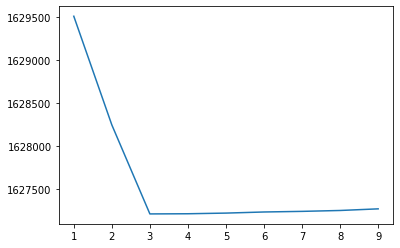

In [18]:
plt.plot(range(1,10),AIC)

In [19]:
np.argmin(AIC)+1

3